# I.Mở đầu
## 1. Tổng quan
Nghiên cứu này khảo sát ảnh hưởng của các yếu tố như thời tiết, giá nhiên liệu, chỉ số giá tiêu dùng (CPI), tỷ lệ thất nghiệp và các ngày lễ đến doanh số bán hàng hàng tuần tại các cửa hàng Walmart. Việc hiểu được các yếu tố này sẽ giúp các nhà quản lý cải thiện hiệu quả kinh doanh và lập kế hoạch chiến lược tốt hơn.
## 2. Câu hỏi nghiên cứu
Những yếu tố nào ảnh hưởng đến doanh thu? <br> 
Các yếu tố như nhiệt độ không khí và chi phí nhiên liệu có thể ảnh hưởng đến sự thành công của một công ty lớn cùng với chỉ số sức mua và chiết khấu theo mùa không? <br>
## 3. Mục đích nghiên cứu
Động lực cho nghiên cứu này đến từ nhu cầu ngày càng tăng của các nhà quản lý để hiểu rõ hơn các yếu tố ảnh hưởng đến doanh số bán hàng, từ đó giúp họ tối ưu hóa các chiến dịch tiếp thị và chiến lược quản lý hàng tồn kho.


# II. Dữ liệu
Bộ dữ liệu được lấy từ https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data
<br>Bộ dữ liệu ghi lại thông tin bán hàng hàng tuần của các cửa hàng Walmart, bao gồm các thông tin về doanh số bán hàng, nhiệt độ trung bình, giá nhiên liệu, chỉ số giá tiêu dùng (CPI), và tỷ lệ thất nghiệp. Các dữ liệu này được thu thập để phân tích ảnh hưởng của các yếu tố này lên doanh số bán hàng. 
## 1. Cấu trúc Dữ liệu:
Store: Mã số của cửa hàng Walmart
<br>Date: Ngày ghi nhận doanh số
<br>Weekly_Sales: Doanh số bán hàng hàng tuần tại mỗi cửa hàng.
<br>Holiday_Flag: Biến này cho biết liệu tuần đó có phải là tuần lễ hay không (1 nếu có ngày lễ, 0 nếu không).
<br>Temperature: Nhiệt độ trung bình trong tuần tại vị trí của cửa hàng theo độ đo faraday
<br>Fuel_Price: Giá nhiên liệu trung bình theo đơn vị gallon trong tuần tại vị trí của cửa hàng.
<br>CPI: Chỉ số giá tiêu dùng, một chỉ số đo lường sự biến động giá cả hàng hóa và dịch vụ tại vị trí của cửa hàng.
<br>Unemployment: Tỷ lệ thất nghiệp tại vị trí của cửa hàng trong tuần đó.

## 2. Tiền xử lí dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
df=pd.read_csv('/kaggle/input/walmart-sales/Walmart_sales.csv')
df
warnings.filterwarnings('ignore')

In [3]:
# Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Chuyển đổi kiểu dữ liệu cột Date
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#df['Week'] = df['Date'].dt.isocalendar().week

df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
# Kiểm tra dữ liệu bị thiếu
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Không có giá trị bị thiếu nên ta không cần xử lí

In [6]:
# Loại bỏ outliers
# z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
# df = df[(z_scores < 3).all(axis=1)] 

In [7]:
# In ra các giá trị thống kê của tập dữ liệu 
df.describe().style.background_gradient(cmap='bone_r')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,nan,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885


Weekly_Sales có độ lệch chuẩn khá cao bằng 1/2 trung vị, gợi ý rằng doanh số bán hàng hàng tuần không ổn định và có thể chịu ảnh hưởng mạnh mẽ bởi các sự kiện nhất định (ví dụ như Black Friday, Giáng sinh, hoặc các ngày lễ lớn khác).

## 3. FEATURE ENGINEERING

In [8]:
# Thêm cột tháng và cột năm vào tập dữ liệu
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [9]:
# Thêm cột mùa vào tập dữ liệu
def date_to_season(date):
    month = datetime.strptime(date, "%Y-%m-%d").month
    
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"
    
df["Season"] = df["Date"].apply(lambda x: date_to_season(x.strftime("%Y-%m-%d")))


# III. EXPLORATORY DATA ANALYSIS

## 1. Phân tích đơn biến

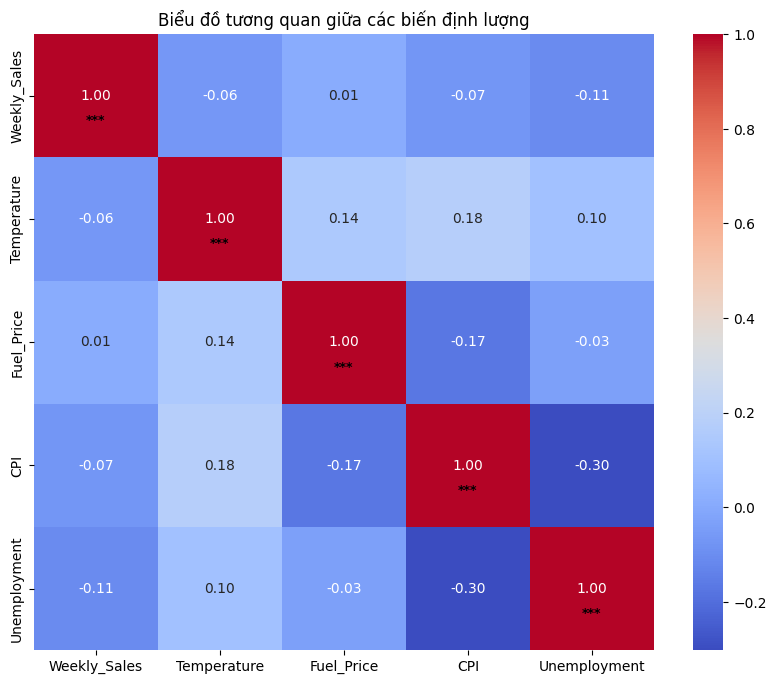

In [10]:
df1 = df.drop([df.columns[0], df.columns[1],df.columns[8],df.columns[9],df.columns[10],df.columns[3]], axis=1)
corr_matrix = df1.corr()

# Vẽ biểu đồ nhiệt tương quan
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Thêm chú thích cho các mức độ tương quan đáng kể
significant_level = 0.5  # Giả định mức độ tương quan đáng kể là 0.5
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        if value > significant_level or value < -significant_level:
            text_coords = ax.get_xticks()[j], ax.get_yticks()[i] + 0.2  
            plt.text(text_coords[0], text_coords[1], '***', ha='center', va='center', color='black', fontsize=9, fontweight='bold')

# Hiển thị biểu đồ
plt.title('Biểu đồ tương quan giữa các biến định lượng')
plt.show()

Không có sự tương quan tuyến tính nào đáng kể ở bảng trên. Nhưng có vẻ như tỉ lệ thất nghiệp cao ít nhiều ảnh hưởng tới CPI tại cửa hàng.

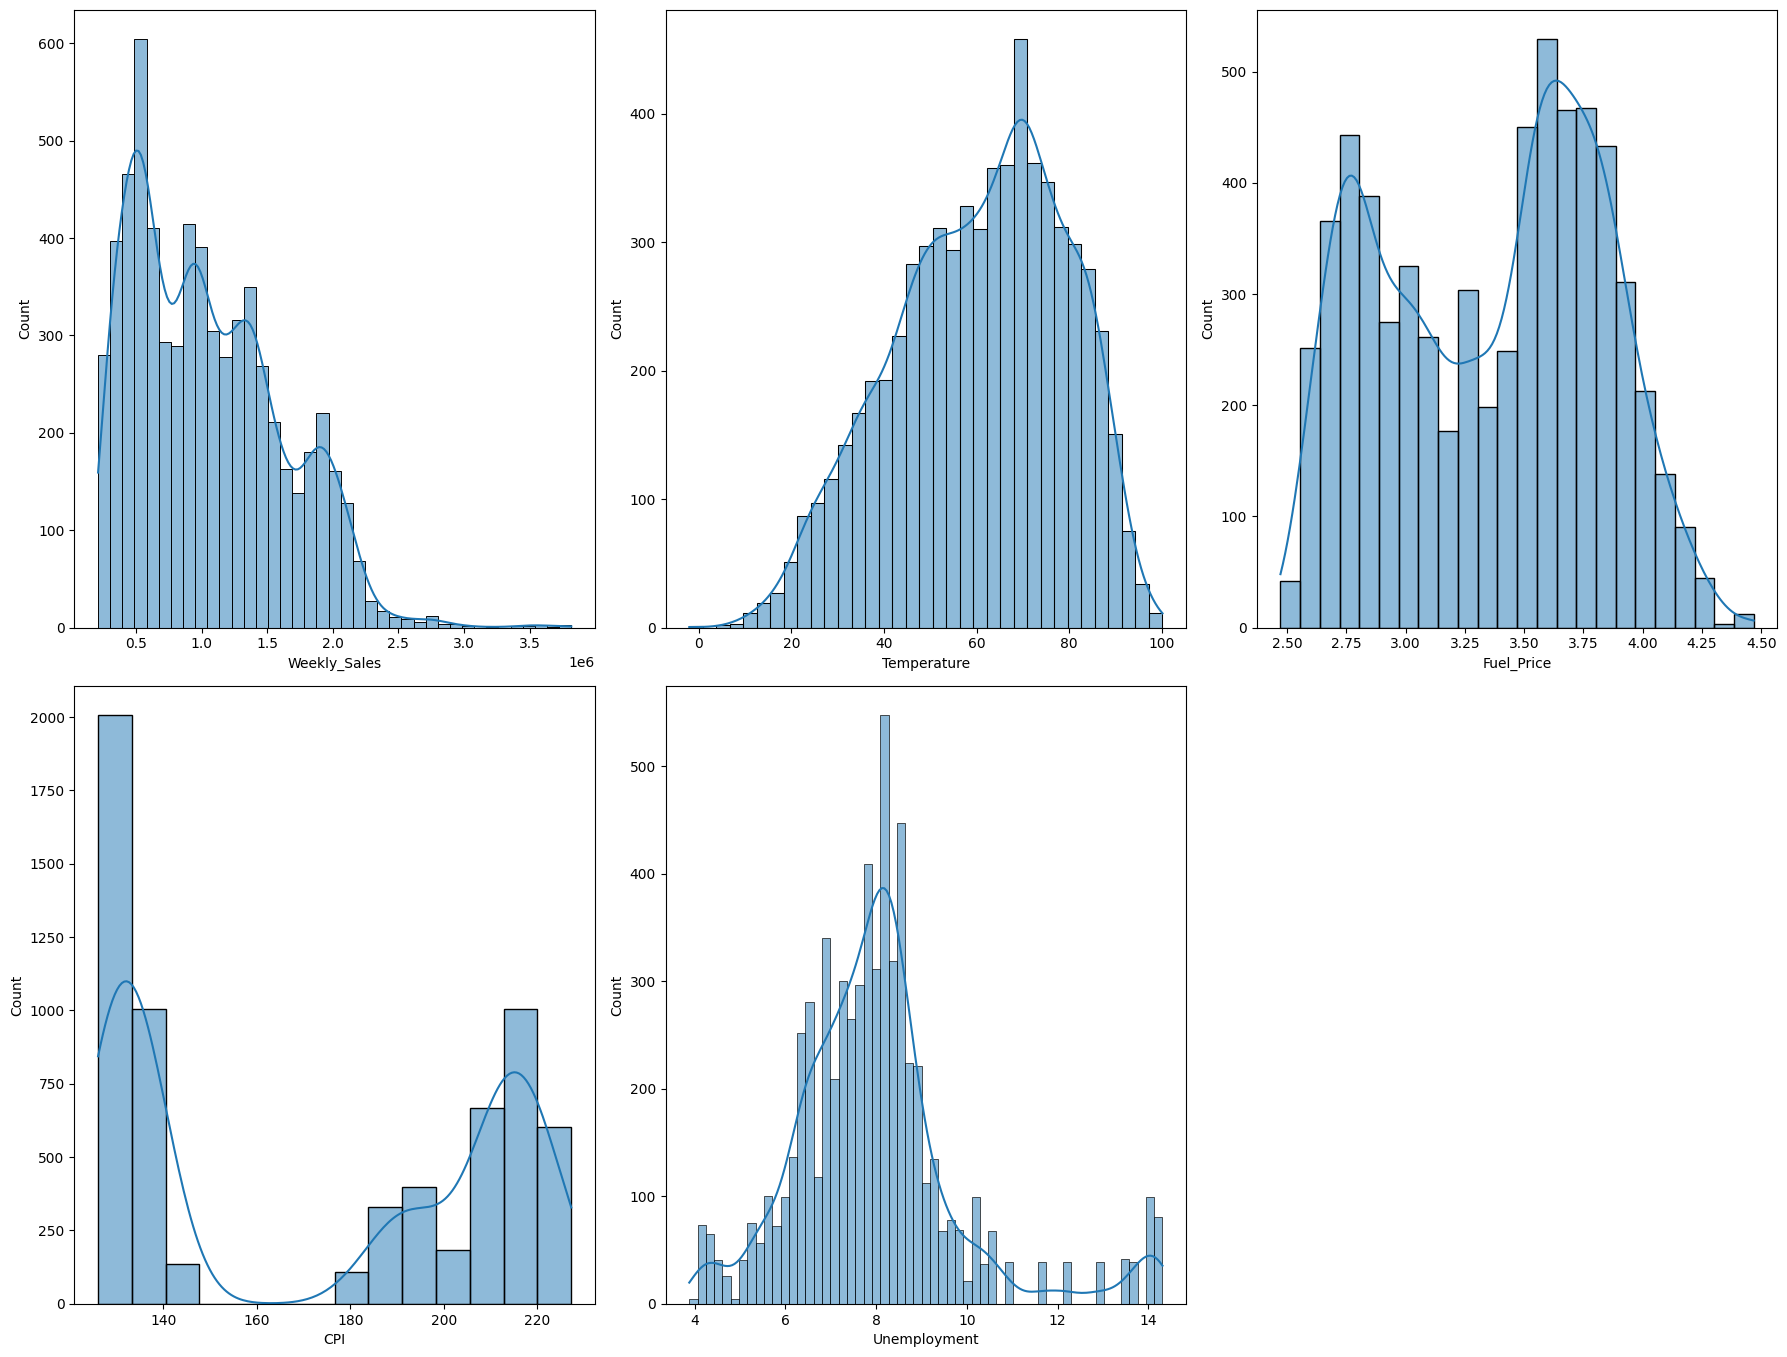

In [11]:
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Set the figure size
plt.figure(figsize=(18, 20))

# Loop through each column in your dataset
for i, col in enumerate(features):
    # Create subplots
    plt.subplot(3, 3, i+1)
    
    # Plot histogram for the current column
    sns.histplot(data=df, x=col, kde=True)

plt.tight_layout()
plt.show()


Doanh số bán hàng hàng tuần: Biểu đồ doanh số bán hàng hàng tuần biểu thị sự phân phối lệch phải, cho thấy rằng có tương đối ít trường hợp doanh số bán hàng rất cao so với số lượng bán hàng thấp hơn. Điều này có thể cho thấy doanh số bán hàng thỉnh thoảng tăng đột biến hoặc một vài giai đoạn hoạt động hiệu quả.

Nhiệt độ và thất nghiệp: Biểu đồ về nhiệt độ và tỷ lệ thất nghiệp thể hiện sự phân bố gần như bình thường, cho thấy phần lớn các điểm dữ liệu tập trung quanh giá trị trung bình với tương đối ít ngoại lệ. Điều này cho thấy những yếu tố này có thể tuân theo các mô hình điển hình mà không có sai lệch đáng kể.

Giá nhiên liệu, CPI: Biểu đồ giá nhiên liệu và CPI thể hiện sự phân bố hai chiều, cho thấy sự hiện diện của hai đỉnh hoặc hai chế độ riêng biệt trong dữ liệu. Điều này có thể ngụ ý sự tồn tại của các điều kiện hoặc trạng thái thị trường khác nhau trong tập dữ liệu, có khả năng chỉ ra các tình huống kinh tế hoặc hành vi của người tiêu dùng khác nhau.

## 2. Phân tích 2 biến

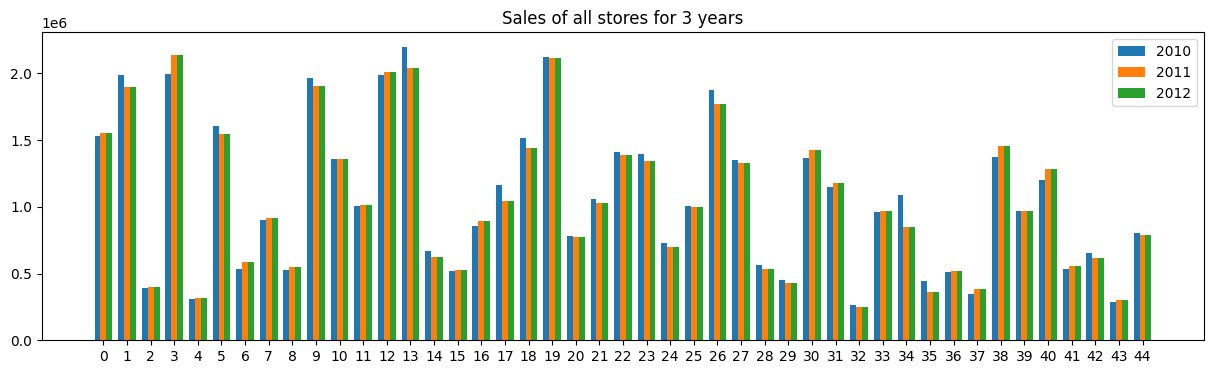

In [12]:


def year_wise_sales(year):
    filt = df['Year'] == year
    result = df.loc[filt].groupby(by='Store')
    values = result['Weekly_Sales'].mean()
    return values 

year_2010 = year_wise_sales(2010)
year_2011 = year_wise_sales(2011)
year_2012 = year_wise_sales(2011)

width = 0.25
x_index =np.arange(len(year_2010))

plt.figure(figsize=(15,4))
plt.title('Sales of all stores for 3 years')
plt.bar(x_index-width,year_2010,width=width,label='2010')
plt.bar(x_index,year_2011,width=width,label='2011')
plt.bar(x_index+width,year_2012,width=width,label='2012')
plt.xticks(x_index)
plt.legend()
plt.show()

Có sự chênh lệch lớn giữa doanh thu của các cửa hàng dù ở bất cứ thời điểm nào.

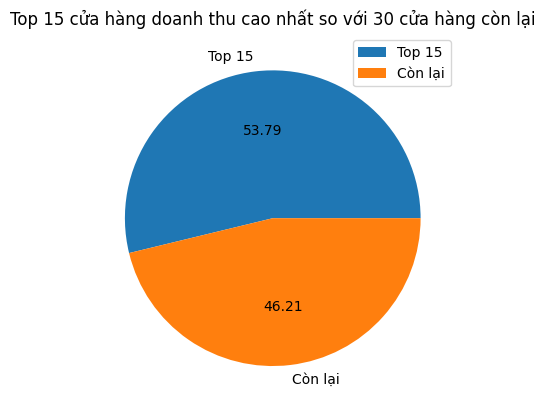

In [13]:
stores = df.groupby(by='Store')
top_stores= sum(stores['Weekly_Sales'].sum().sort_values(ascending=False)[:15]) 
other_stores = sum(stores['Weekly_Sales'].sum().sort_values(ascending=False)[15:]) 
total_sales = sum(stores['Weekly_Sales'].sum())
top = (top_stores / total_sales) *100
bottom = (other_stores / total_sales) *100
sales = [top,bottom]
labels = ['Top 15','Còn lại']

plt.title('Top 15 cửa hàng doanh thu cao nhất so với 30 cửa hàng còn lại')
plt.pie(sales,labels=labels,autopct='%0.2f')
plt.legend()
plt.show()

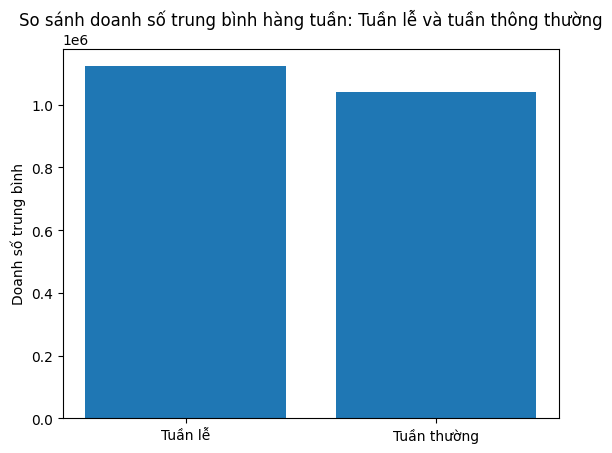

In [14]:
average_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
average_sales_regular = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

plt.bar(['Tuần lễ', 'Tuần thường'], [average_sales_holiday, average_sales_regular])
plt.ylabel('Doanh số trung bình')
plt.title('So sánh doanh số trung bình hàng tuần: Tuần lễ và tuần thông thường')
plt.show()

Doanh số ngày lễ lớn hơn ngày thường nhưng không đáng kể.

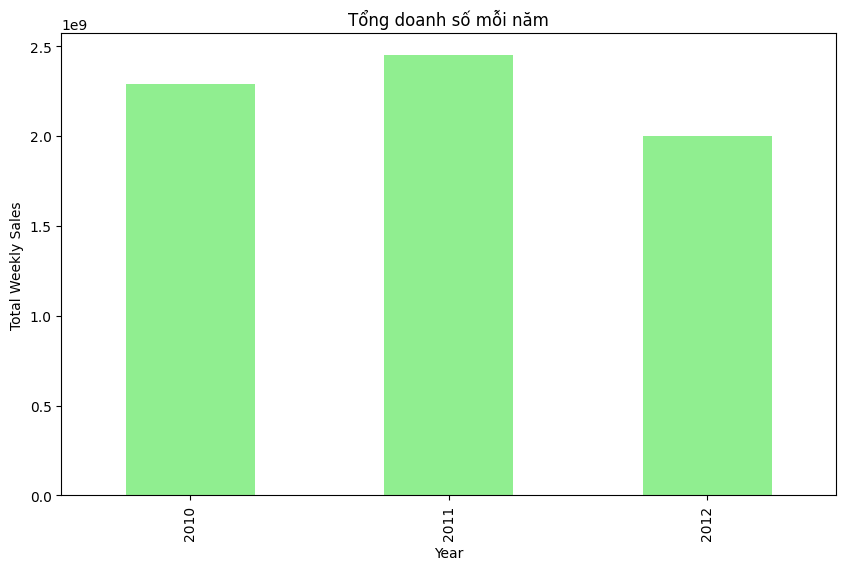

In [15]:
year_sales = df.groupby(df['Year'])['Weekly_Sales'].sum()

# Vẽ biểu đồ thanh cho doanh số hàng tuần theo năm
plt.figure(figsize=(10, 6))
year_sales.plot(kind='bar', color='lightgreen')
plt.title('Tổng doanh số mỗi năm')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.show()

In [16]:
df['Year'].value_counts()

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

Bộ dữ liệu thiếu tháng 1 năm 2010 và tháng 11 12 năm 2012 nên ta không thể so sánh tổng doanh số giữa các năm được.

Text(0.5, 1.0, 'Xếp hạng doanh số theo tháng')

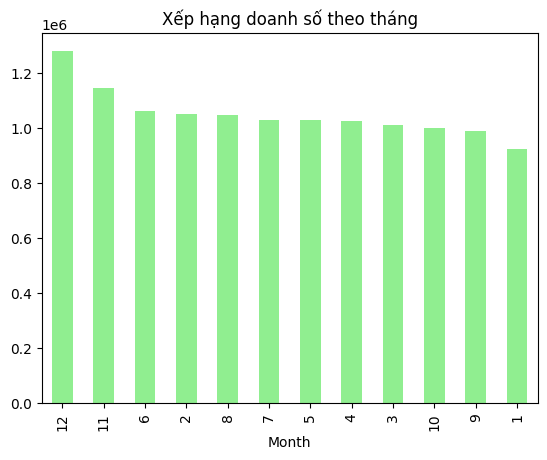

In [17]:
months = df.groupby(by='Month')
months['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='lightgreen')
plt.title('Xếp hạng doanh số theo tháng')

Vào các dịp cuối năm người dân cho nhu cầu mua sắm cao hơn để chuẩn bị cho lễ tạ ơn, Giáng sinh.

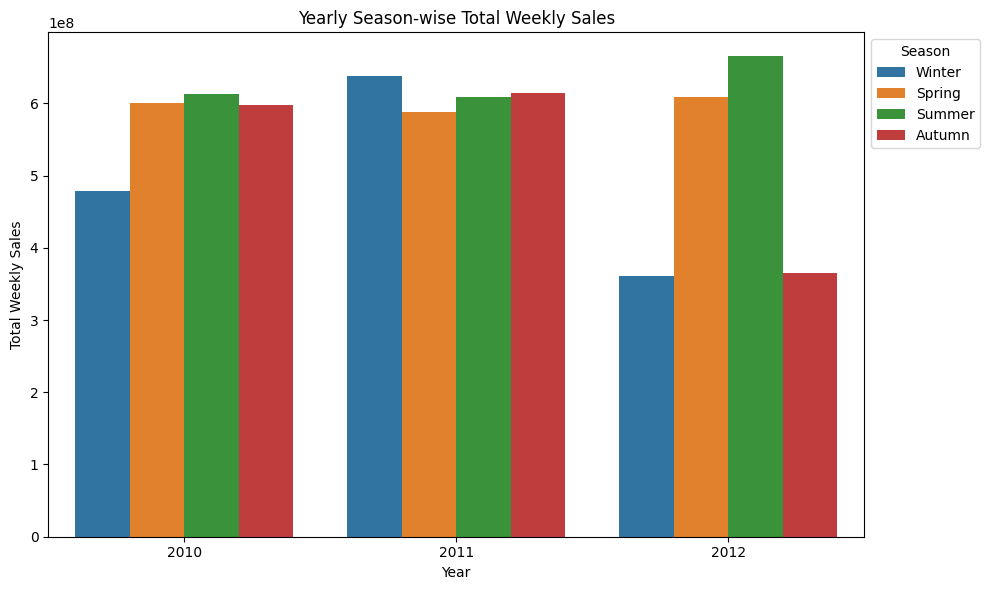

In [18]:
seasonwise_weekly_sales = {}

for season in df['Season'].unique():
    season_sales = df[df['Season'] == season].groupby('Year')['Weekly_Sales'].sum()
    seasonwise_weekly_sales[season] = season_sales

plot_data = []

for season, sales in seasonwise_weekly_sales.items():
    for year, weekly_sales in sales.items():
        plot_data.append({'Year': year, 'Season': season, 'Weekly Sales': weekly_sales})

plot_data = pd.DataFrame(plot_data)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=plot_data, x='Year', y='Weekly Sales', hue='Season', ax=ax, ci=None)

ax.set_xlabel('Year')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Yearly Season-wise Total Weekly Sales')
ax.legend(title='Season', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Các mùa có doanh thu cao nhất năm:
* 2010: Spring
* 2011: Autumn
* 2012: Summer

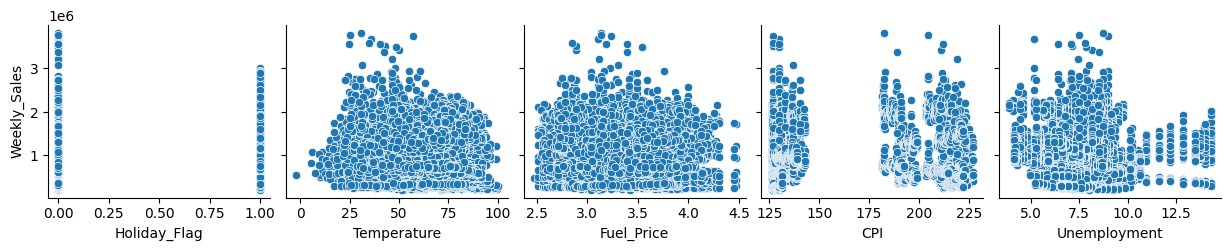

In [19]:
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

Holiday_Flag và Weekly_Sales: Biểu đồ cho thấy doanh số bán hàng có xu hướng tăng trong các ngày lễ, nhưng số lượng điểm dữ liệu cho các ngày lễ (Holiday_Flag = 1) là ít hơn so với ngày thường. Điều này phản ánh tác động tích cực của ngày lễ đối với doanh số bán hàng.

Temperature và Weekly_Sales: Không có một mối quan hệ rõ ràng giữa nhiệt độ và doanh số bán hàng. Dữ liệu phân bố khá đều và không thể hiện xu hướng tăng hoặc giảm rõ rệt khi nhiệt độ thay đổi.

Fuel_Price và Weekly_Sales: Tương tự như nhiệt độ, không có mối quan hệ tuyến tính rõ ràng giữa giá nhiên liệu và doanh số bán hàng. Các điểm dữ liệu phân bố rộng và không có xu hướng tập trung.

CPI và Weekly_Sales: Có vẻ như có một số tập trung điểm dữ liệu ở mức CPI cao hơn, tuy nhiên không thể khẳng định rằng CPI có ảnh hưởng lớn đến doanh số bán hàng từ biểu đồ này mà cần phân tích sâu hơn.

Unemployment và Weekly_Sales: Dữ liệu phân bố không đều, với một số khoảng tập trung điểm dữ liệu ở mức tỷ lệ thất nghiệp thấp và cao. Điều này có thể chỉ ra rằng tỷ lệ thất nghiệp ở một số mức nhất định có ảnh hưởng đến doanh số bán hàng, nhưng cũng cần phân tích thêm để xác định mối quan hệ chính xác.

### Temperature v/s sales

In [20]:
df["Temperature"].min()
df["Temperature"].max()
bins = [0, 25, 50, 75, 100]  # Tạo bin để sắp xếp các giá trị nhiệt độ
labels = ["0-25", "26-50", "51-75", "76-100"]  # Labels
#Phân loại nhiệt độ vào các khoảng chia trước
df["Temp_Category"] = pd.cut(df["Temperature"], bins=bins, labels=labels)
df["Temp_Category"].value_counts()

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       223
Name: count, dtype: int64

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

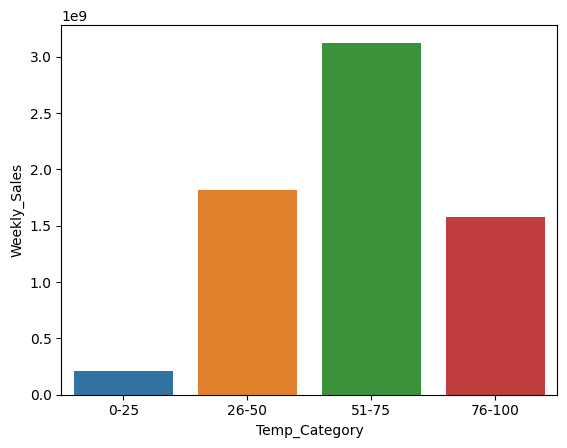

In [21]:
df_temp_sales = df.groupby("Temp_Category")["Weekly_Sales"].sum().reset_index()
sns.barplot(x="Temp_Category", y="Weekly_Sales", data=df_temp_sales)

- Cửa hàng hoạt động tốt trong nhiệt độ vừa phải là 26-50 
- Bán hàng đã đạt đỉnh ở nhiệt độ trung bình đến cao là 51-75 
- Doanh số giảm ở nhiệt độ rất cao và thấp, đó là 0-25 & 76-100 

### Fuel_Price V/s Sales

In [22]:
df["Fuel_Price"].min()
df["Fuel_Price"].max()

4.468

In [23]:
bins1 = [
    2,
    2.5,
    3,
    3.5,
    4,
    4.5,
]  # Tạo bin và label để phân loại giá nhiên liệu
labels1 = ["2-2.5", "2.6-3", "3.1-3.5", "3.6-4", "4.1-4.5"]
df["Fuel_Price_Cat"] = pd.cut(df["Fuel_Price"], bins=bins1, labels=labels1)
df["Fuel_Price_Cat"].value_counts()

Fuel_Price_Cat
3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: count, dtype: int64

<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

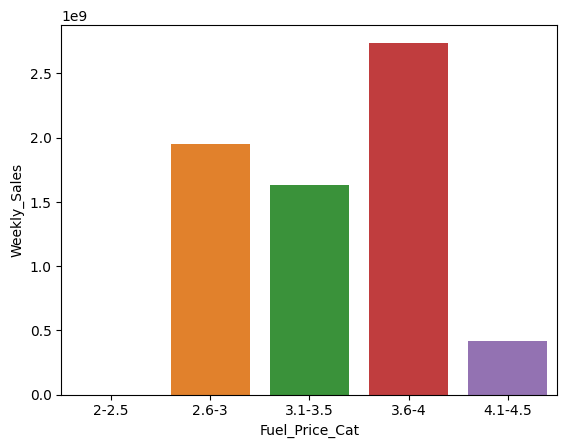

In [24]:
df_Fuel_Price_Sales = df.groupby("Fuel_Price_Cat")["Weekly_Sales"].sum().reset_index()
df_Fuel_Price_Sales
sns.barplot(x="Fuel_Price_Cat", y="Weekly_Sales", data=df_Fuel_Price_Sales)

- Khi giá nhiên liệu được kiểm duyệt, hiệu suất của các cửa hàng cũng rất cao.
- Nhưng giá nhiên liệu đã vượt quá mức độ trung bình là 3,5, và doanh số cũng tăng rất cao.
- Và khi giá nhiên liệu tăng cao, sức mua của người dân đã giảm.

### CPI v/s Sales

In [25]:
df['CPI'].min()


126.064

In [26]:
df['CPI'].max()

227.2328068

In [27]:
bins2=[125,155,185,215,245] 
labels2=['125-155','156-185','186-215','216-245',]

In [28]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [29]:
df['CPI_cat'].value_counts()

CPI_cat
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [30]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

In [31]:
df_Cpi_Sales

,CPI_cat,Weekly_Sales
0,125-155,3.406971e+09
1,156-185,1.751615e+08
2,186-215,2.032509e+09
3,216-245,1.122578e+09


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

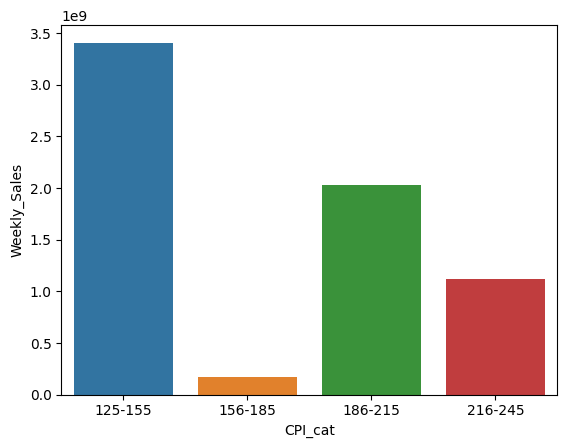

In [32]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

- Khi chỉ số tiêu dùng thấp hơn thì hiệu quả hoạt động của các cửa hàng cao.
- Krong thời  đầu tiên, doanh số bán hàng giảm đáng kể.
- Ở cấp độ thứ ba khi chỉ số tiêu dùng tăng cao, người dân có thể lo sợ về giá cả trong tương lai và cũng mua thêm hàng tạp hóa cho nhu cầu trong tương lai.
- Cuối cùng khi lạm phát lên đến đỉnh điểm thì doanh số bán hàng lại giảm xuống.

### Unemployment V/s Sales

In [33]:
df['Unemployment'].min()

3.879

In [34]:
df['Unemployment'].max()

14.313

In [35]:
bins3=[4,6,8,10,12] 
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [36]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3) 

In [37]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
6.1-8      2795
8.1-10     2389
4-6         618
10.1-12     290
Name: count, dtype: int64

In [38]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

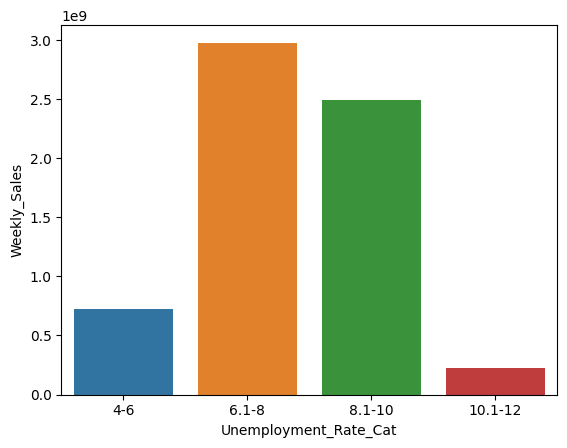

In [39]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

- Khi tỷ lệ thất nghiệp ở mức từ 6 đến 10, các cửa hàng đang hoạt động tốt
- Nhưng bất cứ khi nào tỷ lệ thất nghiệp tăng lên thì doanh số bán hàng lại giảm

# III. Mô hình hóa dữ liệu

## 1. Random Forest

In [40]:
df=pd.read_csv('/kaggle/input/walmart-sales/Walmart_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [41]:
y = df['Weekly_Sales']
x=df.drop(columns = ["Weekly_Sales","Date"])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 301.8 KB


In [42]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
model=rf.fit(x,y)
model.score(x,y)

0.9913232993367149

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import math
y_pred = model.predict(x)

# Tính toán chỉ số
mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 52565.99396256965
R-squared: 0.9913232993367149


- RMSE = 52353 so với giá trị trung bình cột Weekly_Sales 1046964 mức chênh lệch dự đoán chỉ 5%
- Với chỉ R-squared = 0.99 mô hình Random-Forest phù hợp với tập dữ liệu 

In [44]:
importances = model.feature_importances_

feature_names = x.columns

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"Importance of {feature}: {importance:.2f}")

Importance of Store: 0.68
Importance of CPI: 0.17
Importance of Unemployment: 0.10
Importance of Temperature: 0.03
Importance of Fuel_Price: 0.02
Importance of Holiday_Flag: 0.00


### Nhận xét
- Store (0.68): Đặc trưng này có tầm quan trọng cao nhất, chiếm 68% tổng tầm quan trọng. Điều này cho thấy vị trí hoặc số hiệu của cửa hàng có ảnh hưởng lớn nhất đến kết quả dự đoán, có thể do các yếu tố như kích thước cửa hàng, vị trí địa lý, lượng khách hàng, hoặc các yếu tố quản lý khác nhau giữa các cửa hàng.

- CPI (0.17): Chỉ số giá tiêu dùng (CPI) là đặc trưng quan trọng thứ hai, chiếm 17% tầm quan trọng. Điều này cho thấy CPI, một chỉ số kinh tế phản ánh mức giá tiêu dùng chung, cũng có tác động đáng kể đến doanh số bán hàng. CPI cao có thể ảnh hưởng đến sức mua của người tiêu dùng.

- Unemployment (0.10): Tỷ lệ thất nghiệp chiếm 10% tầm quan trọng. Điều này cho thấy tình hình việc làm tại khu vực gần cửa hàng cũng ảnh hưởng tới doanh thu, với suy đoán rằng tỷ lệ thất nghiệp cao có thể làm giảm khả năng chi tiêu của người tiêu dùng.

- Temperature (0.03) và Fuel Price (0.02): Nhiệt độ và giá nhiên liệu có tầm quan trọng thấp hơn nhiều, lần lượt là 3% và 2%. Những đặc trưng này có ảnh hưởng nhỏ đến dự đoán doanh thu, có thể do chúng không trực tiếp ảnh hưởng đến quyết định mua sắm hàng ngày của người tiêu dùng như các yếu tố kinh tế khác.

- Holiday_Flag (0.00): Có vẻ như việc có phải là ngày lễ hay không không ảnh hưởng đáng kể đến doanh thu trong mô hình này, điều này có thể bất ngờ vì người ta thường kỳ vọng ngày lễ sẽ có sự tăng doanh số.Store (0.68): Đặc trưng này có tầm quan trọng cao nhất, chiếm 68% tổng tầm quan trọng. Điều này cho thấy vị trí hoặc số hiệu của cửa hàng có ảnh hưởng lớn nhất đến kết quả dự đoán, có thể do các yếu tố như kích thước cửa hàng, vị trí địa lý, lượng khách hàng, hoặc các yếu tố quản lý khác nhau giữa các cửa hàng.

- CPI (0.17): Chỉ số giá tiêu dùng (CPI) là đặc trưng quan trọng thứ hai, chiếm 17% tầm quan trọng. Điều này cho thấy CPI, một chỉ số kinh tế phản ánh mức giá tiêu dùng chung, cũng có tác động đáng kể đến doanh số bán hàng. CPI cao có thể ảnh hưởng đến sức mua của người tiêu dùng.

- Unemployment (0.10): Tỷ lệ thất nghiệp chiếm 10% tầm quan trọng. Điều này cho thấy tình hình việc làm tại khu vực gần cửa hàng cũng ảnh hưởng tới doanh thu, với suy đoán rằng tỷ lệ thất nghiệp cao có thể làm giảm khả năng chi tiêu của người tiêu dùng.

- Temperature (0.03) và Fuel Price (0.02): Nhiệt độ và giá nhiên liệu có tầm quan trọng thấp hơn nhiều, lần lượt là 3% và 2%. Những đặc trưng này có ảnh hưởng nhỏ đến dự đoán doanh thu, có thể do chúng không trực tiếp ảnh hưởng đến quyết định mua sắm hàng ngày của người tiêu dùng như các yếu tố kinh tế khác.

- Holiday_Flag (0.00): Có vẻ như việc có phải là ngày lễ hay không không ảnh hưởng đáng kể đến doanh thu trong mô hình này, điều này có thể bất ngờ vì người ta thường kỳ vọng ngày lễ sẽ có sự tăng doanh số.

## 2. KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [46]:
y = df['Weekly_Sales']
feature_names = df.columns.drop(["Weekly_Sales", "Date"])
rmse_results = {}
feature_names

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [47]:
x = df.drop(columns=[feature, 'Weekly_Sales','Date'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
# Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra không loại bỏ đặc trưng nào
y_pred = knn.predict(X_test)
rmseDataSet = math.sqrt(mean_squared_error(y_test, y_pred))

for feature  in feature_names:
    # Tạo một DataFrame mới bằng cách loại bỏ một đặc trưng
    x = df.drop(columns=[feature , 'Weekly_Sales','Date'])  # Loại bỏ cột mục tiêu và đặc trưng hiện tại
    
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Khởi tạo và huấn luyện mô hình KNN
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = knn.predict(X_test)
    
    # Tính RMSE và lưu vào dictionary
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[feature] = rmse


In [48]:
# In ra kết quả RMSE khi loại bỏ từng đặc trưng
print(f"RMSE full is : {rmseDataSet:.4f}")
for feature, rmse in rmse_results.items():
    print(f"RMSE when '{feature}' is removed: {rmse:.4f}")

RMSE full is : 289114.1088
RMSE when 'Store' is removed: 590288.6746
RMSE when 'Holiday_Flag' is removed: 303147.5627
RMSE when 'Temperature' is removed: 156547.5207
RMSE when 'Fuel_Price' is removed: 304984.8224
RMSE when 'CPI' is removed: 321040.4716
RMSE when 'Unemployment' is removed: 327015.5912


### Nhận xét
- 'Store': Khi loại bỏ đặc trưng này, RMSE tăng đáng kể từ 289114.1 lên 590288.67. Điều này cho thấy 'Store' là đặc trưng rất quan trọng và có ảnh hưởng lớn đến dự đoán doanh thu hàng tuần. Sự khác biệt lớn về RMSE chứng tỏ rằng thông tin về cửa hàng cụ thể đóng vai trò chính trong việc xác định doanh số bán hàng.

* 'Holiday_Flag': Khi loại bỏ đặc trưng này, RMSE thực tế lại giảm nhẹ từ 327015.59 xuống 303147.56. Điều này có thể cho thấy rằng 'Holiday_Flag' có thể không cần thiết hoặc thậm chí làm giảm hiệu quả của mô hình. Có thể trong dữ liệu có đủ thông tin khác để bù đắp cho sự thiếu hụt này hoặc cột này không mang lại thông tin hữu ích cho mô hình.

* 'Temperature', 'Fuel_Price','Unemployment' và 'CPI': Khi loại bỏ các đặc trưng này, RMSE tăng nhẹ hoặc giảm nhẹ, cho thấy chúng có tác động vừa phải đến dự đoán của mô hình. Đặc biệt, 'Temperature' có vẻ như là đặc trưng quan trọng hơn cả vì khi loại bỏ nó, RMSE giảm khá nhiều (156547.52), điều này có thể gợi ý rằng nhiệt độ có ảnh hưởng đến mô hình nhưng có thể làm giảm độ chính xác khi có mặt.

# IV. Kết luận
- Ví trí cửa hàng góp phần quan trọng trong doanh thu của 1 cửa hàng.
- Ngày lễ chưa hẳn đã đạt được nhiều doanh thu.
- Giá tiêu dùng cũng ảnh hưởng phần nào đến tâm lí người tiêu dùng.